In [106]:
# 9-Google_Stock_Prediction_Program_Using_Python_ML
# Description: This program predicts the price of Google Stock for a Specific Day

In [107]:
# Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [123]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving GOOG_3M.csv to GOOG_3M.csv


In [124]:
# Store and look at the data
df = pd.read_csv('GOOG_3M.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-26,1437.270020,1441.000000,1412.130005,1417.020020,1417.020020,2060600
1,2020-05-27,1417.250000,1421.739990,1391.290039,1417.839966,1417.839966,1685800
2,2020-05-28,1396.859985,1440.839966,1396.000000,1416.729980,1416.729980,1692200
3,2020-05-29,1416.939941,1432.569946,1413.349976,1428.920044,1428.920044,1838100
4,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100
...,...,...,...,...,...,...,...
58,2020-08-17,1514.670044,1525.609985,1507.969971,1517.979980,1517.979980,1378300
59,2020-08-18,1526.180054,1562.469971,1523.709961,1558.599976,1558.599976,2027100
60,2020-08-19,1553.310059,1573.680054,1543.949951,1547.530029,1547.530029,1660600
61,2020-08-20,1543.449951,1585.869995,1538.199951,1581.750000,1581.750000,1706900


In [125]:
# Get and print the last row of data
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
62,2020-08-21,1577.030029,1597.719971,1568.005005,1580.420044,1580.420044,1445900


In [126]:
# Prepare the data for training
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-26,1437.270020,1441.000000,1412.130005,1417.020020,1417.020020,2060600
1,2020-05-27,1417.250000,1421.739990,1391.290039,1417.839966,1417.839966,1685800
2,2020-05-28,1396.859985,1440.839966,1396.000000,1416.729980,1416.729980,1692200
3,2020-05-29,1416.939941,1432.569946,1413.349976,1428.920044,1428.920044,1838100
4,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100
...,...,...,...,...,...,...,...
57,2020-08-14,1515.660034,1521.900024,1502.880005,1507.729980,1507.729980,1354800
58,2020-08-17,1514.670044,1525.609985,1507.969971,1517.979980,1517.979980,1378300
59,2020-08-18,1526.180054,1562.469971,1523.709961,1558.599976,1558.599976,2027100
60,2020-08-19,1553.310059,1573.680054,1543.949951,1547.530029,1547.530029,1660600


In [127]:
# Create an empty list to store the independent and dependent data
days = list()
adj_close_prices = list()

In [128]:
# Get the date and the adjusted close price
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:,'Adj Close']
df_days

0     2020-05-26
1     2020-05-27
2     2020-05-28
3     2020-05-29
4     2020-06-01
         ...    
57    2020-08-14
58    2020-08-17
59    2020-08-18
60    2020-08-19
61    2020-08-20
Name: Date, Length: 62, dtype: object

In [129]:
# Create the independent data set
count = 0
for day in df_days:
  count = count + 1
  days.append([count])
  #days.append([int(day.split('-')[2])])

# Create the dependent data set
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

days[3]

[4]

In [133]:
# Create the 3 Support Vector Regression Model

# Create a train a SVR model using a linera kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

# Create a train a SVR model using a linera kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree = 2)
poly_svr.fit(days, adj_close_prices)

# Create a train a SVR model using a linera kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

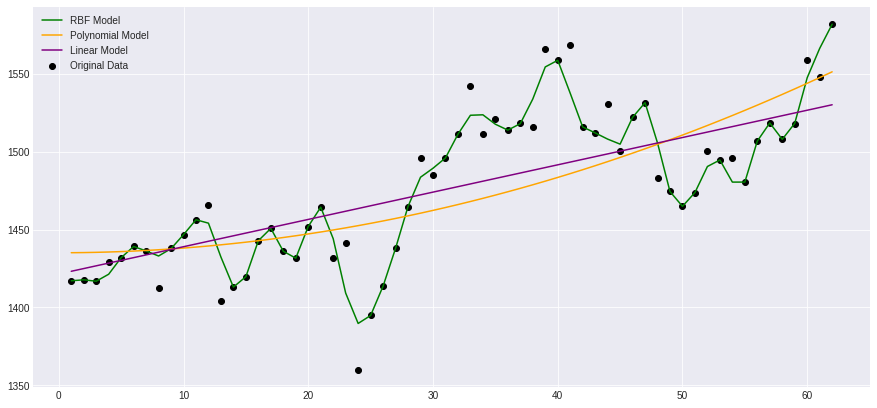

In [134]:
# Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(15,7))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='purple', label='Linear Model')
plt.legend()
plt.show()

In [104]:
adj_close_prices

[1146.209961,
 1137.810059,
 1132.119995,
 1250.410034,
 1239.410034,
 1225.140015,
 1216.680054,
 1209.01001,
 1193.98999,
 1152.319946,
 1169.949951,
 1173.98999,
 1204.800049,
 1188.01001,
 1174.709961,
 1197.27002,
 1164.290039,
 1167.26001,
 1177.599976,
 1198.449951,
 1182.689941,
 1191.25,
 1189.530029,
 1151.290039,
 1168.890015,
 1167.839966,
 1171.02002,
 1192.849976,
 1188.099976,
 1168.390015,
 1181.410034,
 1211.380005,
 1204.930054,
 1204.410034,
 1206.0,
 1220.170044,
 1234.25,
 1239.560059,
 1231.300049,
 1229.150024,
 1232.410034,
 1238.709961,
 1229.930054,
 1234.030029,
 1218.76001,
 1246.52002,
 1241.390015,
 1225.089966,
 1219.0,
 1205.099976,
 1176.630005,
 1187.829956,
 1209.0,
 1207.680054,
 1189.130005,
 1202.310059,
 1208.670044,
 1215.449951,
 1217.140015,
 1243.01001,
 1243.640015,
 1253.069946,
 1245.48999,
 1246.150024,
 1242.800049,
 1259.130005,
 1260.98999,
 1265.130005,
 1290.0,
 1262.619995,
 1261.290039,
 1260.109985,
 1273.73999,
 1291.369995,
 1292